### Importing Libraries

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Soil Plant Analysis Development(SPAD)

In [121]:
# Load the dataset
data = pd.read_csv('SPAD.csv')
data.head()

,P,K,temperature,humidity,ph,rainfall,temperature_min,phenological_stage,leaf_area_index,spad_value,...,Phenological_Stage_Num,Normalized_SPAD,Growth_Stage,Leaf_Age,Fertilizer_Type,Irrigation_mm,Crop_Yield_g_per_plant,Plant_Variety,Epigenetic_Markers,Soil_Nitrogen
0,42,43,20.879744,82.002744,6.502985,202.935536,18.765005,Germination,4.906222,25.859851,...,0,-1.015650,15.728596,1,Urea,20,87.5,Variety_A,83.555061,44.737543
1,58,41,21.770462,80.319644,7.038096,226.655537,18.037935,Germination,2.040303,38.874521,...,0,0.529820,23.766875,1,DAP,20,92.0,Variety_A,85.490865,67.252921
2,55,44,23.004459,82.320763,7.840207,263.964248,19.774700,Flowering,2.847604,21.199694,...,3,-1.623814,39.963756,4,DAP,20,79.5,Variety_A,85.266289,36.675470
3,35,40,26.491096,80.158363,6.980401,242.864034,23.107836,Flowering,2.880328,32.666838,...,3,-0.289251,55.795946,4,Urea,20,74.5,Variety_A,81.263860,56.513631
4,42,42,20.130175,81.604873,7.628473,262.717340,16.650526,Germination,3.822810,41.280424,...,0,0.815516,63.128778,1,DAP,20,81.0,Variety_A,82.231590,71.415134


In [32]:
data.describe()

,P,K,temperature,humidity,ph,rainfall,temperature_min,leaf_area_index,spad_value,GDD,Cumulative_GDD,Phenological_Stage_Num,Normalized_SPAD,Growth_Stage,Leaf_Age,Irrigation_mm,Crop_Yield_g_per_plant,Epigenetic_Markers,Soil_Nitrogen
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2.200000e+03,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,22.603917,3.037772,35.040046,14.121357,14958.527651,2.002727,-4.090909e-12,16064.068150,3.002727,25.290909,76.031818,80.041530,60.619280
std,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,5.222073,1.152603,8.589770,5.078644,9306.058671,1.412602,9.990901e-01,9940.772756,1.412602,4.992665,39.959335,24.350889,14.860302
min,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,4.502515,1.000102,20.014768,0.000000,9.822374,0.000000,-1.793315e+00,15.728596,1.000000,20.000000,8.500000,38.024539,34.625549
25%,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,19.450365,2.052143,27.824920,11.172097,6359.112223,1.000000,-8.389990e-01,6915.048500,2.000000,20.000000,47.000000,65.329751,48.137112
50%,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,22.667351,3.049996,34.971077,14.123405,14666.602365,2.000000,-5.554205e-04,15770.071995,3.000000,30.000000,73.000000,75.253057,60.499963
75%,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,25.437936,4.023133,42.273524,16.952160,22703.015007,3.000000,8.289691e-01,24359.186235,4.000000,30.000000,89.500000,86.488222,73.133197
max,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,42.007166,4.999727,49.992072,32.683841,31066.985420,4.000000,1.842997e+00,33270.456720,5.000000,30.000000,192.500000,153.509964,86.486284


#### 1. Data Preprocessing

#### 1.1 Categorical Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Fertilizer_Type_encoded'] = le.fit_transform(data['Fertilizer_Type'])
data['Plant_Variety_encoded'] = le.fit_transform(data['Plant_Variety'])

In [34]:
data.head(3)

,P,K,temperature,humidity,ph,rainfall,temperature_min,phenological_stage,leaf_area_index,spad_value,...,Growth_Stage,Leaf_Age,Fertilizer_Type,Irrigation_mm,Crop_Yield_g_per_plant,Plant_Variety,Epigenetic_Markers,Soil_Nitrogen,Fertilizer_Type_encoded,Plant_Variety_encoded
0,42,43,20.879744,82.002744,6.502985,202.935536,18.765005,Germination,4.906222,25.859851,...,15.728596,1,Urea,20,87.5,Variety_A,83.555061,44.737543,2,0
1,58,41,21.770462,80.319644,7.038096,226.655537,18.037935,Germination,2.040303,38.874521,...,23.766875,1,DAP,20,92.0,Variety_A,85.490865,67.252921,0,0
2,55,44,23.004459,82.320763,7.840207,263.964248,19.774700,Flowering,2.847604,21.199694,...,39.963756,4,DAP,20,79.5,Variety_A,85.266289,36.675470,0,0


In [35]:
data.drop(['phenological_stage', 'Fertilizer_Type', 'Plant_Variety'], axis=1, inplace=True)

In [36]:
data.head(3)

,P,K,temperature,humidity,ph,rainfall,temperature_min,leaf_area_index,spad_value,GDD,...,Phenological_Stage_Num,Normalized_SPAD,Growth_Stage,Leaf_Age,Irrigation_mm,Crop_Yield_g_per_plant,Epigenetic_Markers,Soil_Nitrogen,Fertilizer_Type_encoded,Plant_Variety_encoded
0,42,43,20.879744,82.002744,6.502985,202.935536,18.765005,4.906222,25.859851,9.822374,...,0,-1.015650,15.728596,1,20,87.5,83.555061,44.737543,2,0
1,58,41,21.770462,80.319644,7.038096,226.655537,18.037935,2.040303,38.874521,9.904199,...,0,0.529820,23.766875,1,20,92.0,85.490865,67.252921,0,0
2,55,44,23.004459,82.320763,7.840207,263.964248,19.774700,2.847604,21.199694,11.389579,...,3,-1.623814,39.963756,4,20,79.5,85.266289,36.675470,0,0


#### 1.2 Scaling and Normalization

In [37]:
from sklearn.preprocessing import StandardScaler

* Separating Numerical and Categorical Columns:

In [38]:
numerical_cols = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'temperature_min', 'leaf_area_index', 'spad_value', 'GDD',
       'Cumulative_GDD', 'Normalized_SPAD', 'Growth_Stage', 'Leaf_Age', 
        'Irrigation_mm', 'Crop_Yield_g_per_plant', 'Epigenetic_Markers', 'Soil_Nitrogen'
        ]

categorical_cols = ['Fertilizer_Type_encoded', 'Phenological_Stage_Num', 'Plant_Variety_encoded']

numerical_data = data[numerical_cols]
categorical_data = data[categorical_cols]

In [39]:
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Converting scaled data to DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

# Combining scaled numerical data with categorical data
final_df = pd.concat([scaled_numerical_df, categorical_data], axis=1)

In [40]:
final_df.head(3)

,P,K,temperature,humidity,ph,rainfall,temperature_min,leaf_area_index,spad_value,GDD,...,Normalized_SPAD,Growth_Stage,Leaf_Age,Irrigation_mm,Crop_Yield_g_per_plant,Epigenetic_Markers,Soil_Nitrogen,Fertilizer_Type_encoded,Phenological_Stage_Num,Plant_Variety_encoded
0,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,-0.735299,1.621438,-1.068979,-0.846675,...,-1.016806,-1.614763,-1.418080,-1.059977,0.287062,0.144320,-1.068979,2,0,0
1,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,-0.874561,-0.865602,0.446502,-0.830560,...,0.530423,-1.613954,-1.418080,-1.059977,0.399702,0.223835,0.446502,0,0,0
2,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,-0.541904,-0.165028,-1.611626,-0.538017,...,-1.625663,-1.612324,0.706143,-1.059977,0.086813,0.214610,-1.611626,0,3,0


### 2. Model Building

In [41]:
# Defining features and target
X = data.drop(columns=['Crop_Yield_g_per_plant'])
y = data['Crop_Yield_g_per_plant']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
#storing all model performance metric scores
model_scores = {}

In [46]:
# Defining a function to compute regression metrics
def calculate_regression_metrics(y_test, y_pred, model_name="Model"):
    # R-squared (R2)
    r2 = round(r2_score(y_test, y_pred) * 100, 2)
    
    # Mean Absolute Error (MAE)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    
    # Mean Squared Error (MSE)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    
    # Root Mean Squared Error (RMSE)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

    print(f"R-squared (R2): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    
    return {
        'R2': r2,
        'MAE':mae,
        'MSE':mse,
        'RMSE':rmse,
    }

#### We know that our Independent variables are highly correlated with each other which can cause instability in linear regression models. In such case we will use Regularization or switch to models that are less sensitive to multicollinearity.

### 1. Lasso Regression(L1 Regularization)

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso_model = Lasso(alpha=5.0,max_iter=50,tol=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=5.0, max_iter=50, tol=0.1)

In [49]:
# Make predictions
y_pred_lasso = lasso_model.predict(X_test)
metrics = calculate_regression_metrics(y_test, y_pred_lasso, model_name="Lasso")
model_scores["Lasso_Reg"] = list(metrics.values())

R-squared (R2): 87.6
Mean Absolute Error (MAE): 11.6
Mean Squared Error (MSE): 187.92
Root Mean Squared Error (RMSE): 13.71


#### Results:
1. MAE of 11.6 grams and RMSE of 13.71 grams are relatively small,(range is 8.5 to 192.5 grams of target variable).
2. R² of 87.6% shows the model explains most of the variability in the crop yield data.

### 2. Elastic Net(Hybrid of Ridge and Lasso):

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
elastic_model = ElasticNet(alpha=5.0, l1_ratio=0.5,max_iter=1000,tol=0.1)  # l1_ratio is the mix between L1 and L2
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=5.0, tol=0.1)

In [52]:
# Make predictions
y_pred_elastic = elastic_model.predict(X_test)
metrics = calculate_regression_metrics(y_test, y_pred_elastic, model_name="ElasticNet")
model_scores["Elastic_Net"] = list(metrics.values())

R-squared (R2): 87.75
Mean Absolute Error (MAE): 11.51
Mean Squared Error (MSE): 185.61
Root Mean Squared Error (RMSE): 13.62


### 3. Principal Component Regression(PCR)

* PCR reduces multicollinearity by performing Principal Component Analysis (PCA) on the features first.
* It reduces the dimensions by transforming correlated features into a set of uncorrelated components and then uses these components in linear regression.

In [101]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [102]:
# Applying PCA to the features
pca = PCA(n_components=10)  # Select the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [103]:
# Fitting linear regression on the principal components
pcr_model = LinearRegression()
pcr_model.fit(X_train_pca, y_train)

LinearRegression()

In [104]:
# Make predictions
y_pred_pcr = pcr_model.predict(X_test_pca)
metrics = calculate_regression_metrics(y_test, y_pred_pcr, model_name="PCR")
model_scores["PCR"] = list(metrics.values())

R-squared (R2): 99.53
Mean Absolute Error (MAE): 2.06
Mean Squared Error (MSE): 7.12
Root Mean Squared Error (RMSE): 2.67


#### Result:
1. PCA Effectiveness: Reducing the dimensions to 10 principal components seems to work well, as the performance metrics suggest a highly accurate model.
2. Prediction Accuracy: The low MAE, MSE, and RMSE values imply that the model is making very accurate predictions with minimal error.

In [105]:
print(pca.explained_variance_ratio_)

[9.99955150e-01 2.07541701e-05 1.61137066e-05 2.99195588e-06
 1.62162776e-06 1.55790240e-06 1.25439873e-06 4.27574930e-07
 5.20760562e-08 3.81102616e-08]


> PC1: 99.9955150% of the total variance is explained by the first principal component (PC1). This indicates that the first principal component captures almost all the variance in  data.
> PC2: 0.002075% of the variance is explained by the second principal component.

> Will try with Random Forest also

### 3. RandomForest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [96]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
metrics = calculate_regression_metrics(y_test, y_pred_rf, model_name="RandomForest")
model_scores["RandomForest"] = list(metrics.values())

R-squared (R2): 98.35
Mean Absolute Error (MAE): 4.0
Mean Squared Error (MSE): 24.94
Root Mean Squared Error (RMSE): 4.99


### Results:
1. R-squared (R²): Model explains 98.35% of the variance in the crop yield, which is excellent.
2. Root Mean Squared Error (RMSE): 4.99 aligns well with the MAE and is small relative to the target range.
 * RandomForestRegressor model has performed excellently.
#### * Viewing feature importance can provide insight into which features contribute most to the model's predictions.

In [97]:
feature_importances = rf_model.feature_importances_
# Creating a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(features_df)

                    Feature  Importance
0                         P    0.675731
16       Epigenetic_Markers    0.149460
3                  humidity    0.068176
1                         K    0.038389
13             Growth_Stage    0.029664
10           Cumulative_GDD    0.025231
19    Plant_Variety_encoded    0.003069
5                  rainfall    0.002464
2               temperature    0.001404
7           leaf_area_index    0.001143
4                        ph    0.001099
6           temperature_min    0.001046
9                       GDD    0.000964
12          Normalized_SPAD    0.000544
8                spad_value    0.000465
17            Soil_Nitrogen    0.000450
11   Phenological_Stage_Num    0.000292
14                 Leaf_Age    0.000256
18  Fertilizer_Type_encoded    0.000097
15            Irrigation_mm    0.000055


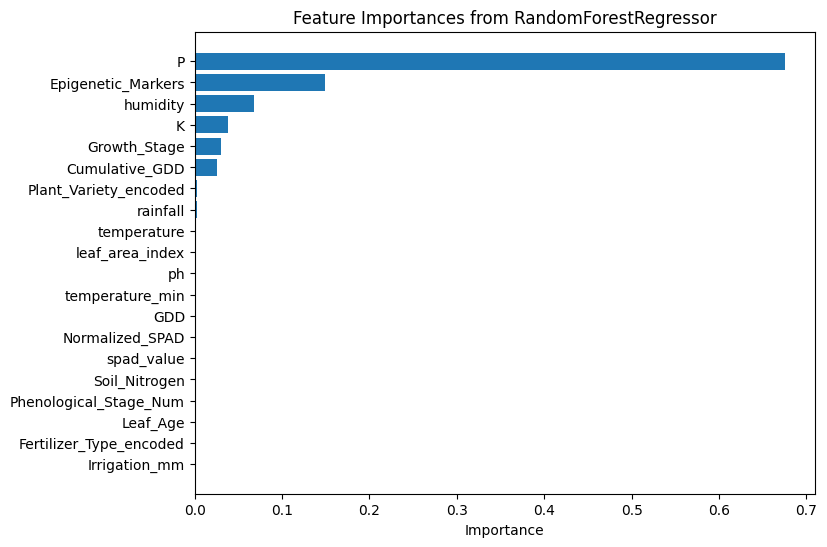

In [98]:
plt.figure(figsize=(8, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from RandomForestRegressor')
plt.gca().invert_yaxis()  
plt.show()

#### Cross-Validation Performance:
* Using cross-validation to check how the model performs on different subsets of the data.

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R2 scores: {cv_scores}')
print(f'Mean cross-validated R2 score: {cv_scores.mean()}')

Cross-validated R2 scores: [0.98300251 0.98522143 0.98204703 0.98321208 0.98359385]
Mean cross-validated R2 score: 0.9834153803510519


#### Interpretation:
* Consistency: The R² scores are consistently high across different folds, indicating that the model performs well and generalizes effectively across different subsets of your data.
* Mean R² Score: The mean R² score of 0.9834 suggests that our model explains approximately 98.34% of the variance in the crop yield across all cross-validation folds, which is excellent.

> Inspecting Residuals

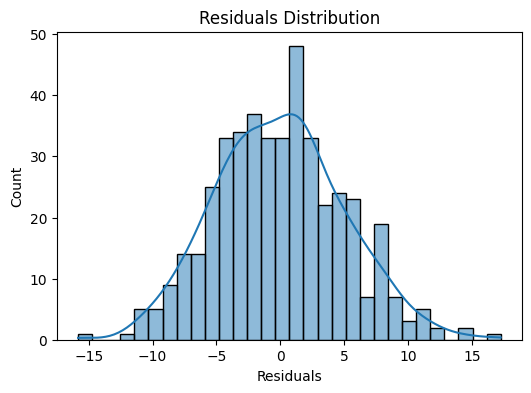

In [106]:
y_pred = rf_model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

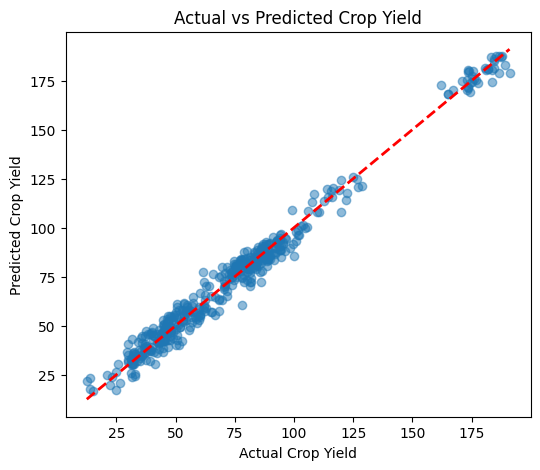

In [111]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.show()

In [112]:
score_df = pd.DataFrame(model_scores).transpose()
score_df.rename(columns = {0 :'R2', 1:'MAE' , 2: 'MSE', 3:'RMSE'}, inplace = True)
score_df.sort_values(by = 'RMSE', ascending = True, inplace = True)

In [113]:
score_df

,R2,MAE,MSE,RMSE
PCR,99.53,2.06,7.12,2.67
RandomForest,98.35,4.00,24.94,4.99
Elastic_Net,87.75,11.51,185.61,13.62
Lasso_Reg,87.60,11.60,187.92,13.71


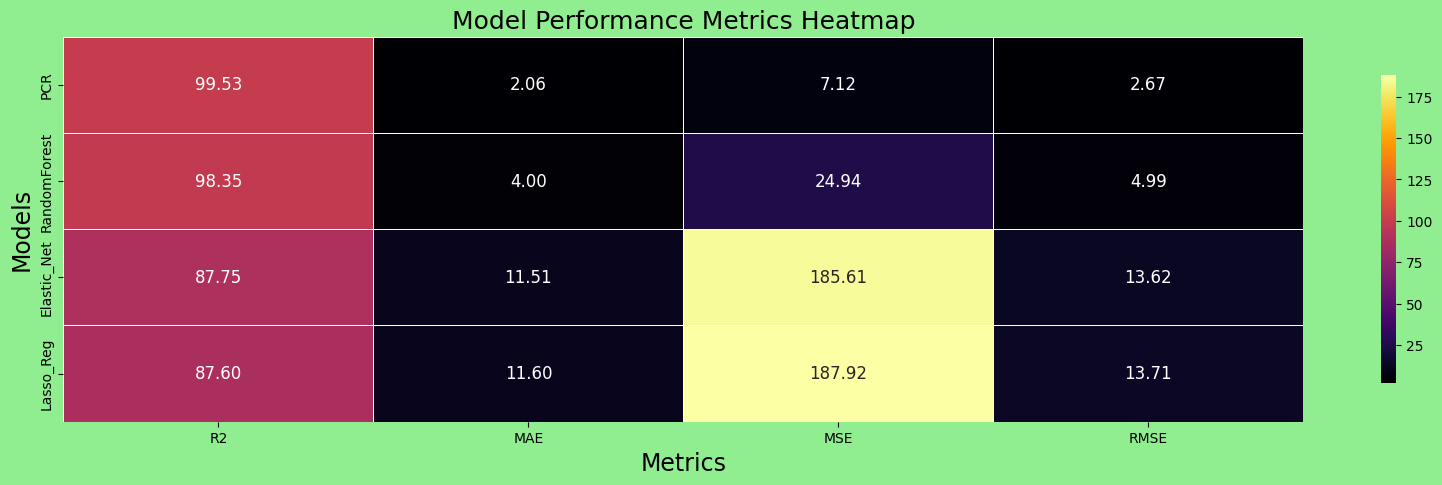

In [109]:
fig = plt.figure(figsize=(20,5), facecolor = '#90ee90')
axes = plt.subplot2grid((1,1),(0,0))
sns.heatmap(
    data = score_df, cmap='inferno', annot = True,fmt='.2f', annot_kws={"size": 12},  
    cbar_kws={"shrink": 0.8},  linewidths=0.5,  linecolor='white' ,
      )

plt.xlabel('Metrics', fontsize=17)
plt.ylabel('Models', fontsize=17)
plt.title('Model Performance Metrics Heatmap', fontsize=18)
plt.show()

### TILL HERE ONLY..